This code is part of Lydia Armini's work as a resarch assistant at Göteborgs Universitet and Chalmers University of Technology
Please contact Beatriz Cabrero-Daniel beatriz.cabrero-daniel@gu.se for questions.

In [5]:
# imports
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import zCurve as z
import math

## Extracting data from each onboard sensor
Then merging in same data frame

In [6]:
def DataToCSV(dirPath):

    times = np.loadtxt(dirPath + "/CAN/speed/t.csv", delimiter=',')
    speeds = np.loadtxt(dirPath + "/CAN/speed/value.csv", delimiter=',')
    angles = np.loadtxt(dirPath + "/CAN/steering_angle/value.csv", delimiter=',')
    accelerations = np.loadtxt(dirPath + "/IMU/accelerometer/value.csv", delimiter=',')
    gyros = np.loadtxt(dirPath + "/IMU/gyro/value.csv", delimiter=',')

    file_path = dirPath + "/GNSS/live_gnss_qcom/value"
    columns = ["Latitude (deg)", "Longitude (deg)", "Speed (m/s)", "UTC Timestamp (s)", "Altitude (m)", "Bearing (deg)"]

    data = np.load(file_path, allow_pickle=True)
    df1 = pd.DataFrame(data, columns=columns)

    minLength = np.min(np.array([np.shape(speeds)[0], np.shape(angles)[0], np.shape(accelerations)[0], np.shape(gyros)[0]]))

    df2 = pd.DataFrame({'time (s)': times[:minLength],'speed (m/s)':speeds[:minLength], 'angles (deg)':angles[:minLength],
                       'acceleration x (m/s^2)':accelerations[:minLength,0], 'acceleration y (m/s^2)':accelerations[:minLength,1], 'acceleration z (m/s^2)':accelerations[:minLength,2],
                       'angular velocity x (deg/s)':gyros[:minLength,0], 'angular velocity y (deg/s)':gyros[:minLength,1], 'angular velcoity z (deg/s)':gyros[:minLength,2]})
    df = pd.concat([df1, df2], axis=1)
    df.to_csv('merged_sensor_data.csv')





[]

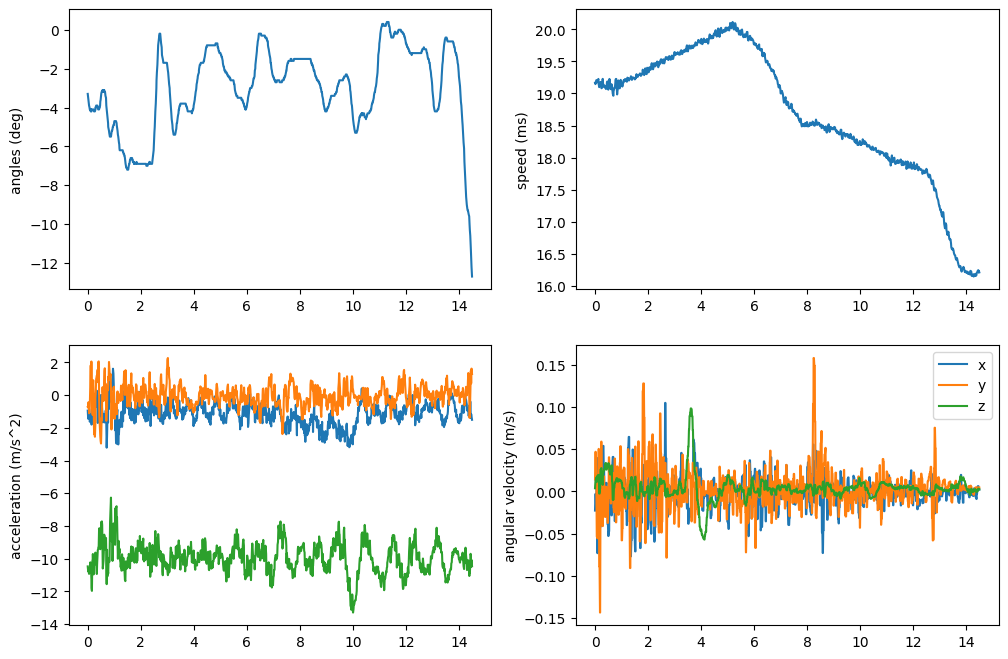

In [7]:
dirPath = 'input_data/Lanechangecitos/2018-07-27--06-03-57_3/processed_log'
DataToCSV(dirPath=dirPath)
data = pd.read_csv('merged_sensor_data.csv')

#data['time (s)'] = data[]
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (12,8))

ax[0][0].plot(data['time (s)'], data['angles (deg)'])
ax[0][0].set_ylabel('angles (deg)')

ax[0][1].plot(data['time (s)'], data['speed (m/s)'])
ax[0][1].set_ylabel('speed (ms)')

ax[1][0].plot(data['time (s)'], data['acceleration x (m/s^2)'], label = 'x')
ax[1][0].plot(data['time (s)'], data['acceleration y (m/s^2)'], label = 'y')
ax[1][0].plot(data['time (s)'], data['acceleration z (m/s^2)'], label = 'z')
ax[1][0].set_ylabel('acceleration (m/s^2)')

ax[1][1].plot(data['time (s)'], data['angular velocity x (deg/s)'], label = 'x')
ax[1][1].plot(data['time (s)'], data['angular velocity y (deg/s)'], label = 'y')
ax[1][1].plot(data['time (s)'], data['angular velcoity z (deg/s)'], label = 'z')
ax[1][1].set_ylabel('angular velocity (m/s)')
plt.legend()
plt.plot()

## Plot speed against time

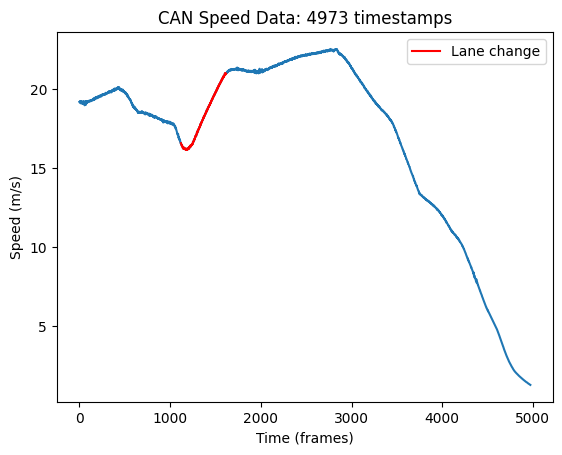

In [8]:
dirPath = 'input_data/Lanechangecitos/2018-07-27--06-03-57_3/processed_log'
times = np.loadtxt(dirPath + "/CAN/speed/t.csv", delimiter=',')
times_lc = np.loadtxt(dirPath + "/CAN/speed/t_lc_1", delimiter=',')
lc_start, lc_end = np.argmin(np.abs(times-times_lc[0])), np.argmin(np.abs(times-times_lc[-1]))

values = np.loadtxt(dirPath + "/CAN/speed/value.csv", delimiter=',')
#values_lc = np.zeros_like(times)
#values_lc[lc_start:lc_end + 1] = values[lc_start:lc_end + 1]

times = np.arange(0,len(times))

fig, ax = plt.subplots()
ax.plot(times, values)
ax.plot(times[lc_start:lc_end + 1], values[lc_start:lc_end + 1], color='red', label ='Lane change')
ax.set_title(f'CAN Speed Data: {times.shape[0]} timestamps')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time (frames)')
ax.legend()
plt.show()

## Plot steering angle against time

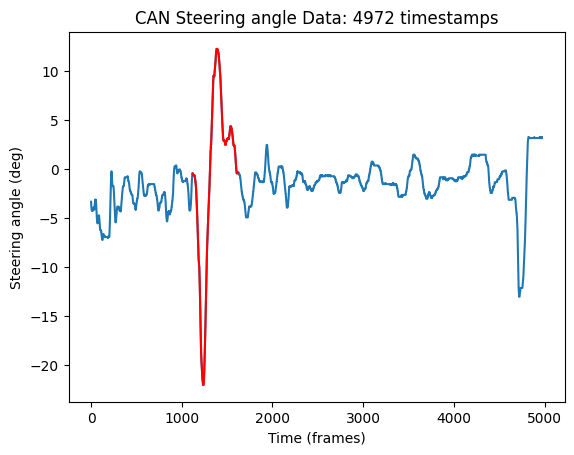

In [9]:
times = np.loadtxt(dirPath + "/CAN/steering_angle/t.csv", delimiter=',')
times_lc = np.loadtxt(dirPath + "/CAN/steering_angle/t_lc_1", delimiter=',')
lc_start, lc_end = np.argmin(np.abs(times-times_lc[0])), np.argmin(np.abs(times-times_lc[-1]))
times = np.arange(0,len(times))

values = np.loadtxt(dirPath + "/CAN/steering_angle/value.csv", delimiter=',')
fig, ax = plt.subplots()
ax.plot(times, values)
ax.plot(times[lc_start:lc_end + 1], values[lc_start:lc_end + 1], color='red', label ='Lane change')
ax.set_title(f'CAN Steering angle Data: {times.shape[0]} timestamps')
ax.set_ylabel('Steering angle (deg)')
ax.set_xlabel('Time (frames)')
plt.show()

## Plot acceleration (x,y,z) against time

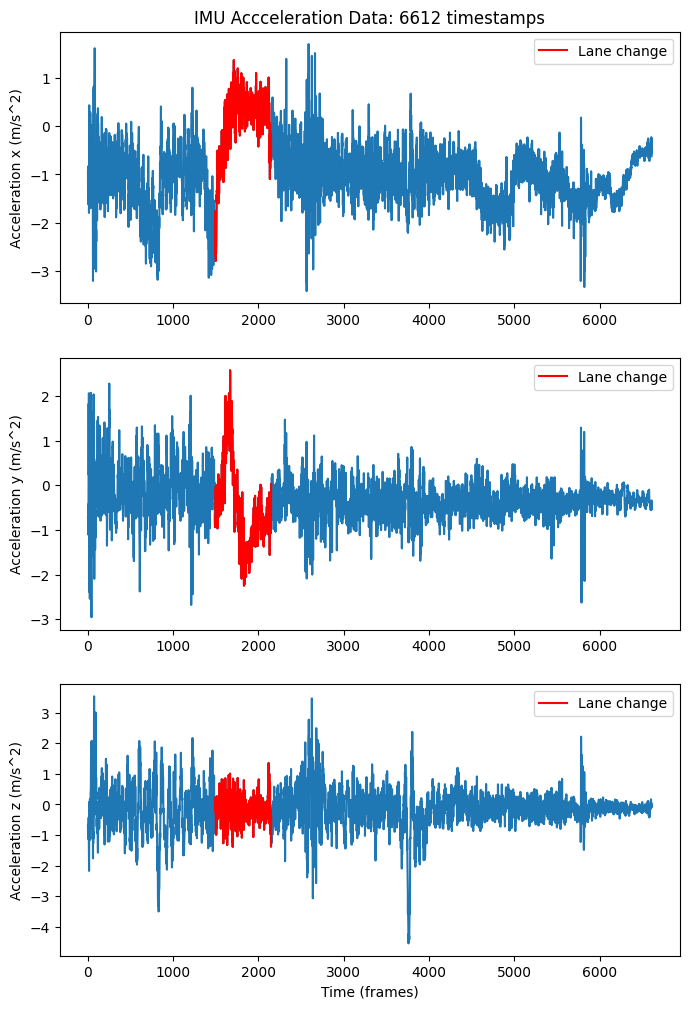

In [10]:
times = np.loadtxt(dirPath + "/IMU/accelerometer/t.csv", delimiter=',')
times_lc = np.loadtxt(dirPath + "/IMU/accelerometer/t_lc_1", delimiter=',')
lc_start, lc_end = np.argmin(np.abs(times-times_lc[0])), np.argmin(np.abs(times-times_lc[-1]))
times = np.arange(0,len(times))

values = np.loadtxt(dirPath + "/IMU/accelerometer/value.csv", delimiter=',')
fig, ax = plt.subplots(nrows=3, figsize=(8,12))

ax[0].plot(times, values[:,0])
ax[0].plot(times[lc_start:lc_end + 1], values[lc_start:lc_end + 1, 0], color='red', label ='Lane change')

ax[1].plot(times, values[:,1])
ax[1].plot(times[lc_start:lc_end + 1], values[lc_start:lc_end + 1, 1], color ='red', label ='Lane change')

ax[2].plot(times, values[:,2] + 9.8)
ax[2].plot(times[lc_start:lc_end + 1], values[lc_start:lc_end + 1, 2] + 9.8, color='red', label ='Lane change')

ax[0].set_title(f'IMU Accceleration Data: {times.shape[0]} timestamps')

ax[0].set_ylabel('Acceleration x (m/s^2)')
ax[1].set_ylabel('Acceleration y (m/s^2)')
ax[2].set_ylabel('Acceleration z (m/s^2)')

ax[2].set_xlabel('Time (frames)')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## Plot gyro/angular velocity (x,y,z) against time 

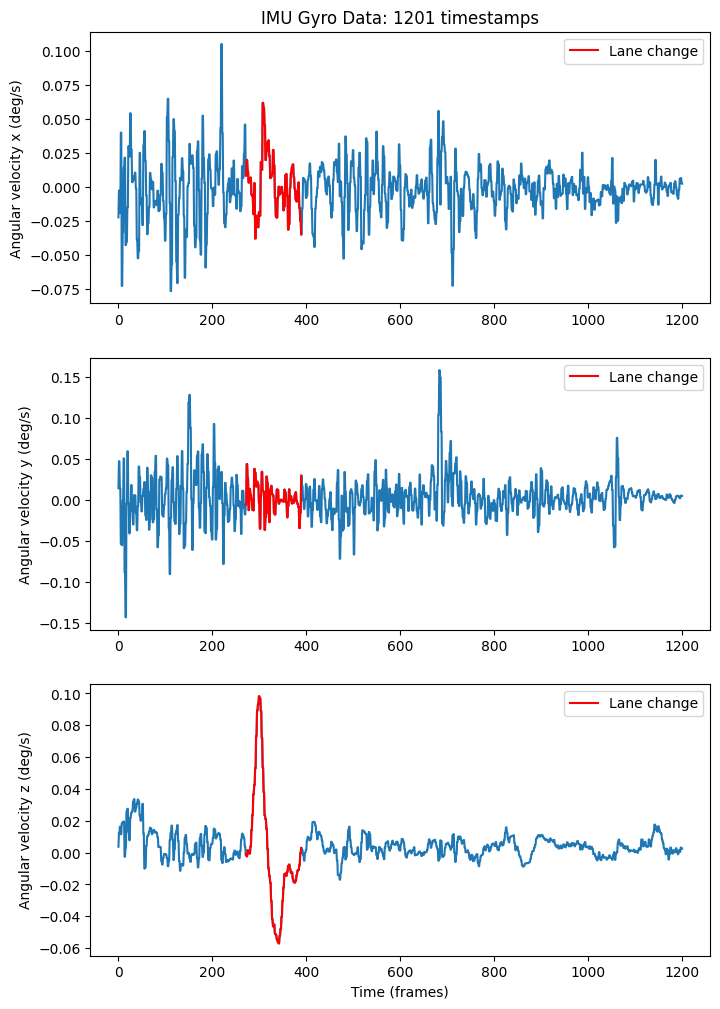

In [11]:

times = np.loadtxt(dirPath + "/IMU/gyro/t.csv", delimiter=',')
times_lc = np.loadtxt(dirPath + "/IMU/gyro/t_lc_1", delimiter=',')
lc_start, lc_end = np.argmin(np.abs(times-times_lc[0])), np.argmin(np.abs(times-times_lc[-1]))
times = np.arange(0,len(times))

values = np.loadtxt(dirPath + "/IMU/gyro/value.csv", delimiter=',')
fig, ax = plt.subplots(nrows=3, figsize=(8,12))

ax[0].plot(times, values[:,0])
ax[0].plot(times[lc_start:lc_end + 1], values[lc_start:lc_end + 1, 0], color='red', label ='Lane change')

ax[1].plot(times, values[:,1])
ax[1].plot(times[lc_start:lc_end + 1], values[lc_start:lc_end + 1, 1], color ='red', label ='Lane change')

ax[2].plot(times, values[:,2])
ax[2].plot(times[lc_start:lc_end + 1], values[lc_start:lc_end + 1, 2], color='red', label ='Lane change')

ax[0].set_title(f'IMU Gyro Data: {times.shape[0]} timestamps')

ax[0].set_ylabel('Angular velocity x (deg/s)')
ax[1].set_ylabel('Angular velocity y (deg/s)')
ax[2].set_ylabel('Angular velocity z (deg/s)')

ax[2].set_xlabel('Time (frames)')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## Plot position against time 

In [12]:
# Load the GNSS data
file_path = dirPath + "/GNSS/live_gnss_qcom/value"
columns = ["Latitude (deg)", "Longitude (deg)", "Speed (m/s)", "UTC Timestamp (s)", "Altitude (m)", "Bearing (deg)"]
data = np.load(file_path, allow_pickle=True)
df1 = pd.DataFrame(data, columns=columns)
df1.to_csv('gnss_data.csv')

[]

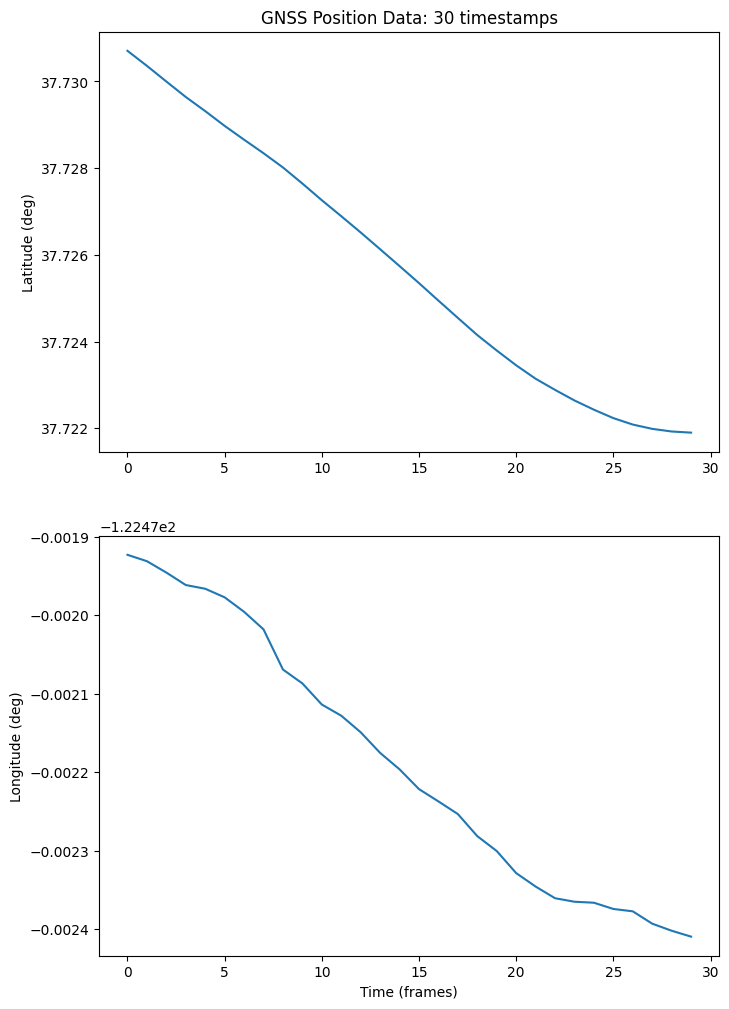

In [13]:
times = df1["UTC Timestamp (s)"].to_numpy()
values_lat = df1["Latitude (deg)"].to_numpy()
values_lon = df1["Longitude (deg)"].to_numpy()
times = np.arange(0,len(times))

fig, ax = plt.subplots(nrows=2, figsize=(8,12))

ax[0].plot(times, values_lat)
ax[1].plot(times, values_lon)

ax[0].set_ylabel('Latitude (deg)')
ax[1].set_ylabel('Longitude (deg)')
ax[1].set_xlabel('Time (frames)')

ax[0].set_title(f'GNSS Position Data: {times.shape[0]} timestamps')
plt.plot()

## Plot latitude against longitude (for full trajectory)

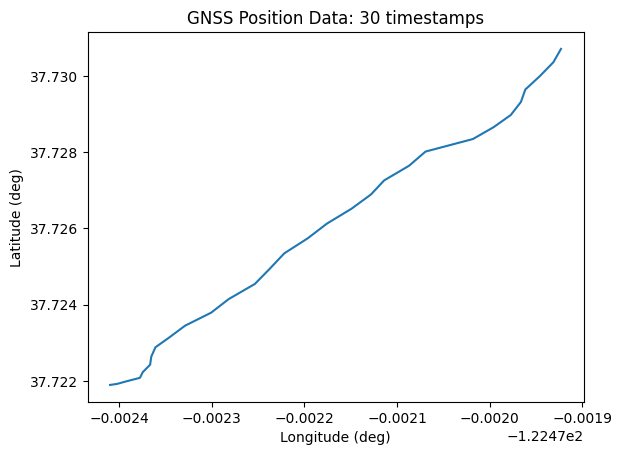

In [14]:
fig, ax = plt.subplots()
ax.plot(values_lon, values_lat)
ax.set_ylabel('Latitude (deg)')
ax.set_xlabel('Longitude (deg)')
ax.set_title(f'GNSS Position Data: {times.shape[0]} timestamps')
plt.show()


In [15]:
# Get speed and angle data
filePath = "input_data/Lanechangecitos/2018-07-27--06-03-57_3/processed_log"

timeSpeedFile = filePath + "/CAN/speed/t.csv"
speedFile = filePath + "/CAN/speed/value.csv"

timeAngleFile = filePath + "/CAN/steering_angle/t.csv"
angleFile = filePath + "/CAN/steering_angle/value.csv"

times, speeds, angles = np.loadtxt(timeSpeedFile), np.loadtxt(speedFile), np.loadtxt(timeSpeedFile)

timeAccelFile = filePath + "/IMU/accelerometer/t.csv"
accelFile = filePath + "/IMU/accelerometer/value.csv"
print(times.shape[0])
print(speeds.shape[0])

4973
4973


In [16]:
def GetPosition(initialPosition, speeds, angles, times):
    anglesInRadians = (2 * np.pi / 360) * angles

    x, y = np.zeros_like(speeds), np.zeros_like(speeds)
    x[0], y[0] = initialPosition[0], initialPosition[1]
    vx, vy = np.sin(anglesInRadians) * speeds, np.cos(anglesInRadians) * speeds
    for i in range(1,len(speeds)):
        dt = np.abs(times[i]-times[i-1])
        #dvx, dvy = np.cos(cartesianAngle) * speeds[i-1], np.sin(cartesianAngle) * speeds[i-1]
        #vx, vy = np.sin(anglesInRadians[i-1]) * speeds[i-1], np.cos(anglesInRadians[i-1]) * speeds[i-1]

        x[i] = x[i-1] + vx[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt

    return x, y

## Approximation of path 
Beware of the low sampling rate

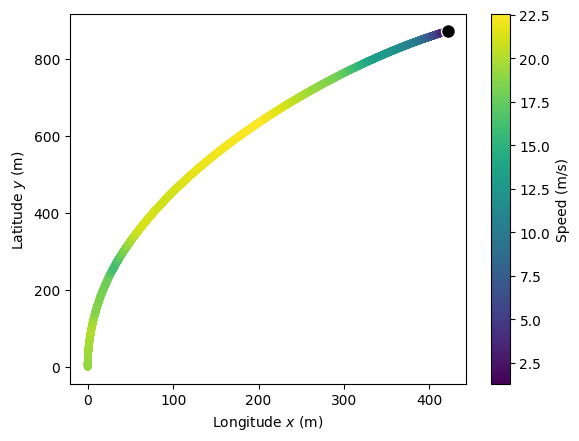

In [17]:
# Plot positions 

p0 = np.array([0,0])
xPositions, yPositions = GetPosition(p0, speeds[:], angles, times)

fig, ax = plt.subplots()
img = ax.scatter(xPositions, yPositions, c=speeds, cmap='viridis', s=20, vmin=np.min(speeds), vmax=np.max(speeds))
fig.colorbar(img, ax = ax, label="Speed (m/s)")
ax.scatter(xPositions[-1], yPositions[-1], s=100, color="black", edgecolors="white")
ax.set_xlabel("Longitude $x$ (m)")
ax.set_ylabel("Latitude $y$ (m)")
plt.show()

## Testing the downsampling function

In [10]:
import numpy as np

def downsample(arr, target_len):
    n = arr.shape[0]
    indices = np.round(np.linspace(0, n - 1, target_len)).astype(int)
    return arr[indices]

arr = np.array([[0, 1, 2, 3, 4, 5, 1], [5, 6, 7, 8, 9, 6, 7]])
downsample(arr, 5)

array([[0, 1, 2, 3, 4, 5, 1],
       [0, 1, 2, 3, 4, 5, 1],
       [0, 1, 2, 3, 4, 5, 1],
       [5, 6, 7, 8, 9, 6, 7],
       [5, 6, 7, 8, 9, 6, 7]])

## Testing the length of sampled sensor values
Trying to understand the differences between the first three recordings (datapoints) and the last four.

In [14]:
import numpy as np
import pandas as pd

file_path = "input_data/Lanechangecitos/2018-07-27--06-03-57_3/processed_log/GNSS/live_gnss_qcom/value"
columns = ["Latitude (deg)", "Longitude (deg)", "Speed (m/s)", "UTC Timestamp (s)", "Altitude (m)", "Bearing (deg)"]

file_path = "input_data/Lanechangecitos/2018-07-31--20-50-28_6/processed_log/IMU/accelerometer/t"
file_path2 = "input_data/Lanechangecitos/2018-08-17--14-55-39_7/processed_log/IMU/accelerometer/t"
columns = ["t"]

data = np.load(file_path, allow_pickle=True)
df = pd.DataFrame(data, columns=columns)
print(df.describe())
print(df.max()-df.min())

data2 = np.load(file_path2, allow_pickle=True)
df2 = pd.DataFrame(data2, columns=columns)
print(df2.describe())
print(df2.max()-df2.min())

                 t
count  6257.000000
mean    627.131456
std      17.322185
min     597.135898
25%     612.133562
50%     627.131390
75%     642.129351
max     657.127169
t    59.991271
dtype: float64
                  t
count   6255.000000
mean   79032.515117
std       17.321828
min    79002.520095
25%    79017.517558
50%    79032.515149
75%    79047.512582
max    79062.510422
t    59.990327
dtype: float64
